In [1]:
import itertools
import random
import time
import heapq
import matplotlib.pyplot as plt

class PriorityQueue:
    def __init__(self, verbose=False):
        self.pq = []
        self.entry_finder = {}
        self.counter = itertools.count()
        self.REMOVED = '<removed>'
        self.verbose = verbose

    def __len__(self):
        return len(self.pq)
    
    def add(self, priority, item):
        if item in self.entry_finder:
            self.update(priority, item)
        else:
            count = next(self.counter)
            entry = [priority, count, item]
            self.entry_finder[item] = entry
            heapq.heappush(self.pq, entry)

    def update(self, priority, item):
        entry = self.entry_finder[item]
        entry[-1] = self.REMOVED #mark the current entry as removed
        count = next(self.counter)
        new_entry = [priority, count, item]
        self.entry_finder[item] = new_entry
        heapq.heappush(self.pq, new_entry)

    def pop(self):
        while self.pq:
            priority, _, item = heapq.heappop(self.pq)
            if item is not self.REMOVED:
                del self.entry_finder[item]
                if self.verbose:
                    print(f"Popped: {item} with priority {priority}")
                return priority, item
        raise KeyError('pop from empty priority queue') 
    

In [2]:
class Edge:
    def __init__(self, vertex, distance):
        self.vertex = vertex
        self.distance = distance

class Graph:
    def __init__(self):
        self.adjacency_list = {}

    def add_edge(self, vertex1, vertex2, distance):
        if vertex1 not in self.adjacency_list:
            self.adjacency_list[vertex1] = []
        self.adjacency_list[vertex1].append(Edge(vertex2, distance))

In [3]:
def Dijkstra(graph, start):
    previous = {v: None for v in graph.adjacency_list.keys()}
    visited = {v: False for v in graph.adjacency_list.keys()}
    distances = {v: float('inf') for v in graph.adjacency_list.keys()}
    distances[start] = 0
    queue = PriorityQueue()
    queue.add(0, start)

    while queue:
        try:
            removed_distance, removed_vertex = queue.pop()
            visited[removed_vertex] = True
            for edge in graph.adjacency_list[removed_vertex]:
                if visited[edge.vertex]:
                    continue
                new_distance = removed_distance + edge.distance
                if new_distance < distances[edge.vertex]:
                    distances[edge.vertex] = new_distance
                    previous[edge.vertex] = removed_vertex
                    queue.add(new_distance, edge.vertex)
        except KeyError:
            break

    return distances, previous

In [ ]:
def reconstruct_path(previous, start, target):
    path = []
    vertex = target
    while vertex is not None:
        path.append(vertex)
        vertex = previous[vertex]
    path.reverse()

    return path if path[0] == start else None

In [4]:
def bidirectional_dijkstra(graph, start, target):
    def dijkstra(queue, distances, other_distances):
        while queue:
            removed_distance, removed_vertex = queue.pop()
            if removed_vertex in other_distances:
                return removed_distance + other_distances[removed_vertex]
            for edge in graph.adjacency_list[removed_vertex]:
                new_distance = removed_distance + edge.distance
                if new_distance < distances.get(edge.vertex, float('inf')):
                    distances[edge.vertex] = new_distance
                    queue.add(new_distance, edge.vertex)
        return float('inf')
    
    if start == target:
        return 0
    
    forward_queue = PriorityQueue()
    backward_queue = PriorityQueue()
    forward_queue.add(0, start)
    backward_queue.add(0, target)
    forward_distances = {start: 0}
    backward_distances = {target: 0}

    while forward_queue and backward_queue:
        forward_result = dijkstra(forward_queue, forward_distances, backward_distances)
        if forward_result != float('inf'):
            return forward_result
        backward_result = dijkstra(backward_queue, backward_distances, forward_distances)
        if backward_result != float('inf'):
            return backward_result
    return float('inf')

In [5]:
def create_graph(num_vertices, num_edges):
    graph = Graph()
    for i in range(num_vertices):
        graph.adjacency_list[i] = []
    for _ in range(num_edges):
        vertex1 = random.randint(0, num_vertices - 1)
        vertex2 = random.randint(0, num_vertices - 1)
        distance = random.randint(1, 10)
        graph.add_edge(vertex1, vertex2, distance)
    return graph

In [6]:
def measure_execution_time(n):
    dijkstra_times = []
    bidirectional_times = []
    for num_vertices in n:
        graph = create_graph(num_vertices, num_vertices*10) #creating random graph
        #test Dijkstra's algorithm
        start_time = time.time()
        Dijkstra(graph, 0)
        end_time = time.time()
        dijkstra_times.append(end_time - start_time)
        print(f"Time taken for Dijkstra's algorithm for {num_vertices} vertices: {end_time - start_time:.5f} seconds")

        #test Bidirectional Dijkstra's algorithm
        start_time = time.time()
        bidirectional_dijkstra(graph, 0, num_vertices-1)
        end_time = time.time()
        bidirectional_times.append(end_time - start_time)
        print(f"Time taken for Bidirectional Dijkstra's algorithm for {num_vertices} vertices: {end_time - start_time:.5f} seconds\n")

    return dijkstra_times, bidirectional_times

Time taken for Dijkstra's algorithm for 1000 vertices: 0.01975 seconds
Time taken for Bidirectional Dijkstra's algorithm for 1000 vertices: 0.00687 seconds

Time taken for Dijkstra's algorithm for 5000 vertices: 0.04634 seconds
Time taken for Bidirectional Dijkstra's algorithm for 5000 vertices: 0.04228 seconds

Time taken for Dijkstra's algorithm for 10000 vertices: 0.14388 seconds
Time taken for Bidirectional Dijkstra's algorithm for 10000 vertices: 0.11388 seconds

Time taken for Dijkstra's algorithm for 50000 vertices: 1.36477 seconds
Time taken for Bidirectional Dijkstra's algorithm for 50000 vertices: 0.65182 seconds

Time taken for Dijkstra's algorithm for 100000 vertices: 2.93076 seconds
Time taken for Bidirectional Dijkstra's algorithm for 100000 vertices: 1.35075 seconds

Time taken for Dijkstra's algorithm for 500000 vertices: 20.11277 seconds
Time taken for Bidirectional Dijkstra's algorithm for 500000 vertices: 6.81847 seconds

Time taken for Dijkstra's algorithm for 10000

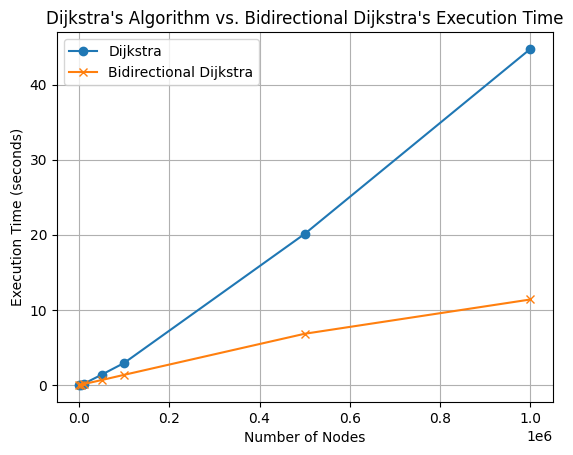

In [8]:
n = [1000, 5000, 10000, 50000, 100000, 500000, 1000000] #, 10000000, 100000000]
dijkstra_times, bidirectional_times = measure_execution_time(n)

plt.plot(n, dijkstra_times, marker='o', label='Dijkstra')
plt.plot(n, bidirectional_times, marker='x', label='Bidirectional Dijkstra')
plt.xlabel('Number of Nodes')
plt.ylabel('Execution Time (seconds)')
plt.title('Dijkstra\'s Algorithm vs. Bidirectional Dijkstra\'s Execution Time')
plt.legend()
plt.grid(True)
plt.show()